## Instructions

Answer the following questions. It behooves you to answer as much of each question as possible to receive some partial credit. You are advised to begin this lab early so that you have ample time to complete it. **Make sure that your code is commented appropriately to receive full credit on each problem**

## Assignment

This assignment is worth 100 points. There are three sections to this homework assignment: a Fundamentals section, an Essentials section, and an Advanced section. You have all of the tools you need to complete all of the lab, but it is triaged for you to give you an idea of what you should focus on first.

### Fundamentals (30 points)

1. (10 points) Is Alan picking up a DSA Minor?

  > Answer: ye


2. (10 points) 

  > Answer: 

3. (10 points) 

> Answer:

### Essentials (50 points)

4. (5 points) Read in the **quakes.csv** file which contains a list of recorded seismic events over a period of time. Use `pandas` to do this.

In [2]:
## Answer
import pandas as pd

quakes = pd.read_csv('quakes.csv')
print(quakes.head())

         date             time   latitude   longitude  depth   mag  \
0  2019-03-28  18:57:03.360000  36.761166 -121.596832   0.99  1.47   
1  2019-03-28  18:53:05.030000  33.500667 -116.799000   3.91  0.84   
2  2019-03-28  18:52:56.040000  33.364833 -117.356167   0.34  1.38   
3  2019-03-28  18:42:17.190000  33.651500 -117.122333  -0.54  0.62   
4  2019-03-28  18:38:12.394000  61.701700 -149.771900  40.20  0.80   

           type              landmark  region  
0    earthquake             Prunedale      CA  
1    earthquake               Aguanga      CA  
2    earthquake  Camp Pendleton North      CA  
3  quarry blast            Winchester      CA  
4    earthquake               Houston  Alaska  


5. (5 points) For earthquakes where the depth was greater than 1.0, determine the maximum, minimum, and average *magnitude* of those quakes.

In [5]:
## Answer

greaterDepth = quakes[quakes.depth > 1.0]

max = quakes.mag.max()
min = quakes.mag.min()
avg = quakes.mag.mean()
print('Max magnitude is', max)
print('Min magnitude is', min)
print('Avg magnitude is', avg)

Max magnitude is 6.1
Min magnitude is -0.46
Avg magnitude is 1.1435798611111125


6. (10 points) Define a function called `numQuakes(region, date)` that accepts two parameters (a `region` string, like "CA" and a `date` string, like "2019-03-27"). Your function should count and return the number of **earthquakes** (see type column) events in that region on that day. Only consider type="earthquakes". 

> Hint: Create a sub-data frame which only contains earthquakes that occurred in that region on that date. Then use the `.count()` method to count the number of earthquakes in that sub-data frame.

In [15]:
## Answer

def numQuakes(region, date):
    """Returns the number of earthquakes
    in the region on the day"""
    
    output = quakes[quakes.type == 'earthquake']
    output = output[quakes.region == region]
    output = output[quakes.date == date]
    return output.count()[0]

print(numQuakes('CA', '2019-03-27'))

89


/var/folders/d1/22hjkymd3j7313hjqwt_dtyjm48_26/T/ipykernel_29795/2030539779.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  output = output[quakes.region == region]
/var/folders/d1/22hjkymd3j7313hjqwt_dtyjm48_26/T/ipykernel_29795/2030539779.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  output = output[quakes.date == date]


7. (5 points) Create a new data frame of `quakes` which contains only the `region`, `magnitude`, and `depth` columns.

In [38]:
slimQuakes = quakes[['region', 'mag', 'depth']]
slimQuakes.head()

,region,mag,depth
0,CA,1.47,0.99
1,CA,0.84,3.91
2,CA,1.38,0.34
3,CA,0.62,-0.54
4,Alaska,0.80,40.20


8. (5 points) Read about the `.groupby()` method in pandas. Use this to show the average depth and magnitude for earthquakes indexed by region (i.e., one row per region, columns for average magnitude and depth).

In [45]:
## Answer

slimQuakes2 = slimQuakes.groupby('region', as_index=False).mean()
print(slimQuakes2.head())

      region       mag      depth
0    Alabama  2.533333   5.000000
1     Alaska  1.522051  35.619744
2    Arizona  1.740000  19.750000
3   Arkansas  1.540000  18.400000
4  Australia  4.400000  10.000000


9. (5 points) Now plot a bar chart (one bar for each region showing average magnitude).  Be sure to add title and label your axis.

<AxesSubplot:title={'center':'Avg Earthquake Mag by Region'}, xlabel='Regions', ylabel='Avg Mag'>

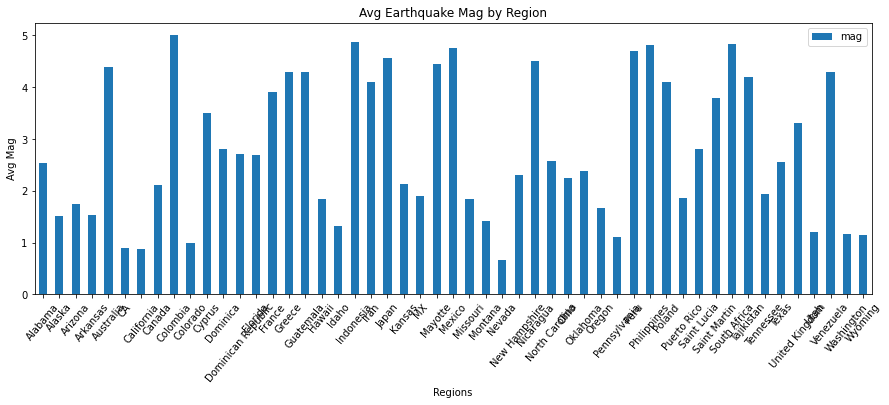

In [58]:
## Answer

slimQuakes2.plot.bar(x='region',y='mag', rot=50, figsize=(15,5), xlabel='Regions', ylabel='Avg Mag', title='Avg Earthquake Mag by Region')

10. (5 points) Now make a histogram of the distribution of the earthquake magnitudes.

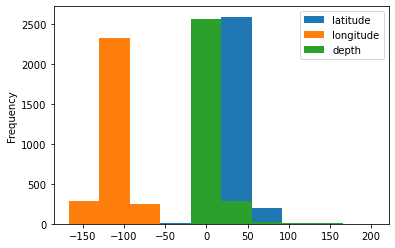

In [52]:
## Answer

hist = quakes.plot(x='mag', kind='hist')

11. (5 points) Make a scatterplot comparing the depth of the earthquake to its magnitude.

In [ ]:
## Answer

12. (10 points) Show a plot of the number/count of earthquakes by landmark. Only show the top 10 landmarks in your plot. To do this you should:
 + Make a new dataframe only containing `type == 'earthquake'` only keeping the columns `landmark` and `type`. 
 + Group by `landmark` and use the `.count()` method and store this `Series`.
 + Look up and use the `.nlargest()` method on that stored series.
 + Plot the result.

In [ ]:
## Answer

### Advanced (20 points)

---
In the following you will use `pandas` to process the `dow_jones_index.data.csv`. 

---

13. (5 points) Define a new function named `symbols(file)` that accepts the `file` name (as a string) from which to read stock data.  The function should compute and return a sorted list of distinct stock symbols (such as AA, AXP, BA ..., XOM). Use the above data set to make sure this works.
 
 >Hint: You only need to keep one column from the data frame. The `.sort_values()` and `.unique()` functions should help you here. 

In [1]:
## Answer


14. (5 points) Define a new function called `dateRange(file)` that accepts a `file` name (as a string) from which to read stock data.  The function should compute and return a tuple consisting of 2 python date objects (not strings): derived from the first and last dates found in the stock data file provided. Test your function to make sure that it works.

>Hint: Look up the `pd.to_datetime()` method and change `df.date` to a date-time type. You can then sort `df.date` easily.

15 (10 points) Create a python fragment that does the following:

 + prompts the user for a valid stock symbol (Use your function you wrote above!). Continue to prompt until the user provides a valid symbol.
 + read the `dow_jones_index.data.csv` file and compute the average close price per month over the date range of the file.  Your algorithm should produce a series in which you provide the average close price for the specified stock for each month.
 + use the `.plot.line()` method to create a line graph displaying the average price of that stock over the date range in the file

In [ ]:
## Answer